<a href="https://colab.research.google.com/github/098Steve/Jupyter/blob/main/CNNExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognising MNIST Digits with Convolution Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
#network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE=1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
#input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10

In [ ]:
#define the convnet
def build (input_shape, classes):
  model = keras.models.Sequential()
  model.add(keras.layers.Convolution2D(20, (5,5), activation ='relu', input_shape=input_shape))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2,2)))
  model.add(keras.layers.Convolution2D(50, (5,5), activation = 'relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(500, activation = 'relu'))
  model.add(keras.layers.Dense (classes, activation = "softmax"))
  return model

Visualisation of LeNet

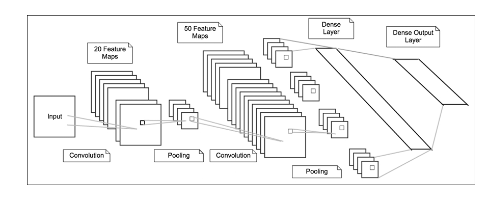

In [ ]:
#Load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#reshape
X_train =X_train.reshape ((60000, 28,28,1))
X_test =X_test.reshape ((10000, 28,28,1))
#normalise
X_train, X_test = X_train/ 255.0, X_test/ 255.0
#cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#convert class vectors into binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile (loss="categorical_crossentropy", optimizer = OPTIMIZER, metrics =["accuracy"])
model.summary()
callbacks= [tf.keras.callbacks.TensorBoard(log_dir='.logs')]



In [ ]:
#fit
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                    validation_split=VALIDATION_SPLIT, callbacks=callbacks)
score = model.evaluate (X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print("\nTest accuracy:", score[1])

How does the score compare with the simple neural network made in Workshop 2?